# Resources And References

 The paper below was analysed and suggested architectures were used.
 
 https://www.researchgate.net/publication/307639575_Artificial_neural_networks_approach_to_the_forecast_of_stock_market_price_movements?enrichId=rgreq-6cf786919532f4a9152422db0a394ec5-XXX&enrichSource=Y292ZXJQYWdlOzMwNzYzOTU3NTtBUzo0MDMyNDU3Njg5NTM4NThAMTQ3MzE1MjY5MTg2Nw%3D%3D&el=1_x_3&_esc=publicationCoverPdf
 

# Imports

In [0]:
from __future__ import print_function, absolute_import, division

# general imports for deep learning
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# data read
import pandas as pd

# plot
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# json and pretty print
import json
import pprint

# handle logging
tf.logging.set_verbosity(tf.logging.INFO)

# Disclaimer

This example does not have any investment advices.

# Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# check if correct place
!ls '/content/gdrive/My Drive/deep_learning/_data/forex/minutely/'

 EURUSD_M1_2013.csv   EURUSD_M1_2017.csv	   EURUSD_M1_201901.csv
 EURUSD_M1_2014.csv  'EURUSD_M1_2018 (1).gsheet'   EURUSD_M1_201902.csv
 EURUSD_M1_2015.csv   EURUSD_M1_2018.csv
 EURUSD_M1_2016.csv   EURUSD_M1_2018.gsheet


# Read And Adjust Data

In this section


1.   Train and Test data were gathered from files.
2.   Data was normalized.
3.   Plots of normalized data were drawn



In [0]:
# initialize file names
data_folder = "/content/gdrive/My Drive/deep_learning/_data/forex/minutely/"
data_filenames = []
data_filenames.append("EURUSD_M1_2013.csv")
data_filenames.append("EURUSD_M1_2014.csv")
data_filenames.append("EURUSD_M1_2015.csv")
data_filenames.append("EURUSD_M1_2016.csv")
data_filenames.append("EURUSD_M1_2017.csv")
data_filenames.append("EURUSD_M1_2018.csv")


In [0]:
# get train data that will be both validation and train data in training mode
data_1 = pd.read_csv(data_folder+data_filenames[0], header=None)
data_2 = pd.read_csv(data_folder+data_filenames[1], header=None)
data_3 = pd.read_csv(data_folder+data_filenames[2], header=None)
data_4 = pd.read_csv(data_folder+data_filenames[3], header=None)
data_5 = pd.read_csv(data_folder+data_filenames[4], header=None)
data_6 = pd.read_csv(data_folder+data_filenames[5], header=None)


In [0]:
# Get all data as list
data_list = [data_1, data_2, data_3, data_4, data_5, data_6]


In [0]:
# Tries to concatenate a list of arrays into one array
def get_concatenated_dataset(d_list):
  result_data = d_list[0]
  for d in d_list[1:]:
    result_data = np.concatenate((result_data, d), axis=None)
    
  return result_data


In [0]:
# Tries to check if the concatenated list is correct.
def concatenate_length_check(d_list, concatenated):
  print("----------- length check -----------")
  total_length = 0
  for d in d_list:  
    total_length += len(d)
    print("length: " +str(len(d)))

  print("concatenated length "+str(len(concatenated)))
  if(len(concatenated) == total_length):
    print("concatenated length -----------> CORRECT")
  else:
    print("concatenated length -----------> WRONG")

In [0]:
# Get CLOSE column in all data
open_data_list = []
high_data_list = []
low_data_list = []
close_data_list = []

for d in data_list:
  close_data_list.append(d[5].as_matrix())
  
# And CONCATENATE all of them
all_data = get_concatenated_dataset(close_data_list)
  
# CHECK IF CONCATENATION IS SUCCESSUL.
concatenate_length_check(close_data_list, all_data)

----------- length check -----------
length: 370611
length: 366477
length: 372210
length: 372679
length: 371635
length: 372607
concatenated length 2226219
concatenated length -----------> CORRECT


In [0]:
# Train Data Has been gathered.
# Now Get Test data

raw_test_data_filename = "EURUSD_M1_201901.csv"
raw_test_data_1 = pd.read_csv(data_folder+raw_test_data_filename, header=None)
raw_test_data_1 = raw_test_data_1[5].as_matrix()#get only CLOSE column

raw_test_data_filename = "EURUSD_M1_201902.csv"
raw_test_data_2 = pd.read_csv(data_folder+raw_test_data_filename, header=None)
raw_test_data_2 = raw_test_data_2[5].as_matrix()#get only CLOSE column

# Concatenate test data
d_list = [raw_test_data_1, raw_test_data_2]
test_data = get_concatenated_dataset(d_list)

# CHECK IF CONCATENATION IS SUCCESSUL.
concatenate_length_check(d_list, test_data)

----------- length check -----------
length: 32085
length: 22613
concatenated length 54698
concatenated length -----------> CORRECT


In [0]:
# normalize train data and test data
norm_all_data = preprocessing.minmax_scale(all_data.reshape(-1, 1), feature_range=(0,1))
norm_test_data = preprocessing.minmax_scale(test_data.reshape(-1, 1), feature_range=(0,1))

print("length of normalized data: "+str(len(norm_all_data)))

length of normalized data: 2226219


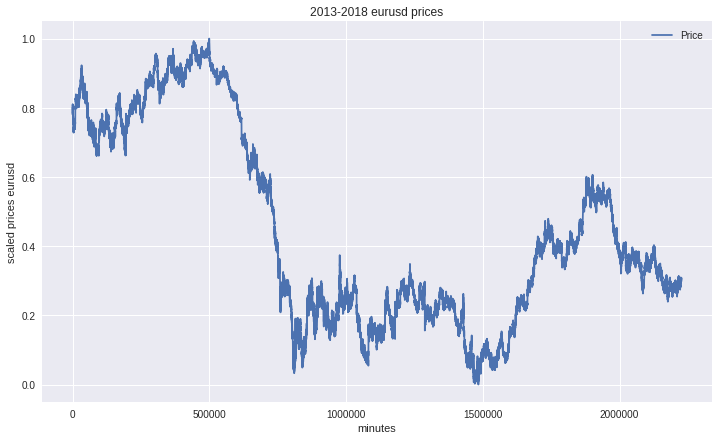

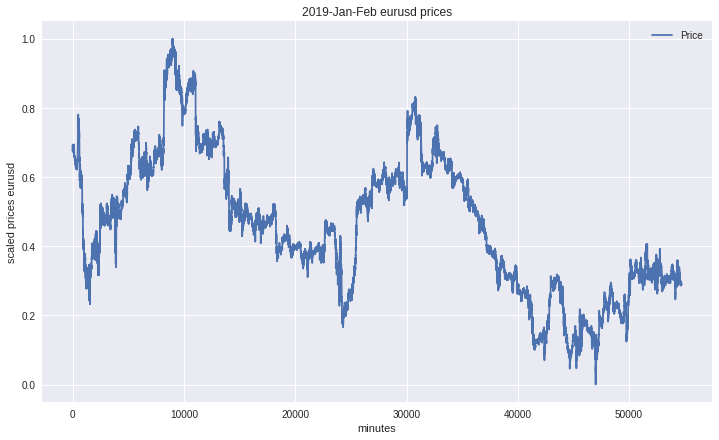

In [0]:
# PLOT TRAIN DATA
plt.figure(figsize=(12,7),frameon=False, facecolor='brown', edgecolor='blue')
plt.title('2013-2018 eurusd prices')
plt.xlabel('minutes')
plt.ylabel('scaled prices eurusd')
plt.plot(norm_all_data, label='Price')
plt.legend()
plt.show()

# PLOT TEST DATA
plt.figure(figsize=(12,7),frameon=False, facecolor='brown', edgecolor='blue')
plt.title('2019-Jan-Feb eurusd prices')
plt.xlabel('minutes')
plt.ylabel('scaled prices eurusd')
plt.plot(norm_test_data, label='Price')
plt.legend()
plt.show()

# Separate Data and Labels

In [0]:
def split_into_chunks(data, train=30, predict=1, step=1, binary=True, scale=True):
  X = []
  y = []
  
  #tf.logging.info("split started [LENGTH: "+str(len(data))+" TRAIN: "+str(train)+" STEP:"+str(step)+"]")
  for i in range(0, len(data), step):
    #tf.logging.info("["+str(i)+"th step]")
    try:
      x_i = data[i:i+train]
      y_i = data[i+train+predict]
      to_checked = data[i+train]
      
      #check if the data is going to be used in a classification or regression
      if binary:
        # prepare classification labels
        if y_i > to_checked:
          y_i = [1., 0.]
        else:
          y_i = [0., 1.]
          
      else:
        # regression
        timeseries = np.array(data[i:i+train+predict])
        if scale:
          timeseries = preprocessing.minmax_scale(timeseries, feature_range=(0,1))
        x_i = timeseries[:-1]
        y_i = timeseries[-1]
    except Exception as e:
      # exit, split finished!
      print("Split Finished...")
      break
      
      
    X.append(x_i)
    y.append(y_i)
    
  return [X, y]

In [0]:
def get_train_validation(X, y, percentage=0.8):
    iXPercentage = int(len(X) * percentage) 
    iYPercentage = int(len(y) * percentage)
    X_train = X[0:iXPercentage]
    Y_train = y[0:iYPercentage]
    
    #X_train, Y_train = shuffle_in_unison(X_train, Y_train)

    X_test = X[iXPercentage:]
    Y_test = y[iYPercentage:]

    return X_train, X_test, Y_train, Y_test

In [0]:
# Get LABELS and get chunks of 'TRAIN DATA'
X,y = split_into_chunks(norm_all_data)

Split Finished...


In [0]:
# GET LABELS AND CHUNKS OF 'TEST DATA'
X_test, y_test = split_into_chunks(norm_test_data)

Split Finished...


In [0]:
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Split TRAIN DATA into TRAIN and VALIDATION DATA
X_train, X_val, Y_train, Y_val = get_train_validation(X, y)

In [0]:
# print train and test values to undrstand
print("train shapes")
pprint.pprint(X_train.shape)
pprint.pprint(Y_train.shape)
print("val shape")
pprint.pprint(X_val.shape)
pprint.pprint(Y_val.shape)
print("test shape")
pprint.pprint(X_test.shape)
pprint.pprint(y_test.shape)
print("length_train:"+str(len(X_train)))
print("length_val: "+str(len(X_val)))
print("length_test: "+str(len(X_test)))

train shapes
(1780950, 30, 1)
(1780950, 2)
val shape
(445238, 30, 1)
(445238, 2)
test shape
(54667, 30, 1)
(54667, 2)
length_train:1780950
length_val: 445238
length_test: 54667


# Suggested MLP Model

In [0]:
# 2 hidden layers and dropout
def get_mlp_model(tensor_input_length, hidden_size_1=100, hidden_size_2=50, dropout=0.5):
  # TODO: check regularizations
  # TODO: check weight initializations
  model = tf.keras.Sequential()
  model.add(layers.Dense(hidden_size_1, 
                         activation='relu', 
                         input_shape=(tensor_input_length,)))
            
  model.add(layers.Dropout(dropout))
  
  model.add(layers.Dense(hidden_size_2, activation='relu'))
  
  # The output dim is 2 Because:
  # Since it is a classification and it will have [1, 0] or [0, 1]
  model.add(layers.Dense(2, activation='softmax'))
  return model
  

## Some Improvements On Suggested Model 1

In [0]:
def get_improved_mlp_model():
  pass

## Compile, Train and Use 'Model 1'

In [0]:
# get model
input_shape = X_train.shape[1]
model_1 = get_mlp_model(tensor_input_length=input_shape)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# summary
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3100      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 8,252
Trainable params: 8,252
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile
# TODO: try with other optimizers, callbacks, etc
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=[tf.keras.metrics.categorical_accuracy])

In [0]:
def get_reshaped(x):
  return x.reshape(x.shape[0], x.shape[1])

In [0]:
# revert some shapes in order to prevent errors
# reshaped (x, y, 1) to (x, y)
X_train = get_reshaped(X_train)
X_test= get_reshaped(X_test)
X_val= get_reshaped(X_val)

In [0]:
# train
model_1.fit(X_train, 
            Y_train, 
            epochs=5, 
            batch_size=120,
            verbose=1,
            validation_data = (X_val, Y_val))


Train on 1780950 samples, validate on 445238 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1780950/1780950 [==============================] - 37s 21us/sample - loss: 0.6907 - categorical_accuracy: 0.5360 - val_loss: 0.6913 - val_categorical_accuracy: 0.5305
Epoch 2/5
1780950/1780950 [==============================] - 36s 20us/sample - loss: 0.6905 - categorical_accuracy: 0.5363 - val_loss: 0.6914 - val_categorical_accuracy: 0.5305
Epoch 3/5
1780950/1780950 [==============================] - 36s 20us/sample - loss: 0.6905 - categorical_accuracy: 0.5363 - val_loss: 0.6913 - val_categorical_accuracy: 0.5305
Epoch 4/5
1780950/1780950 [==============================] - 36s 20us/sample - loss: 0.6905 - categorical_accuracy: 0.5363 - val_loss: 0.6913 - val_categorical_accuracy: 0.5305
Epoch 5/5
1780950/1780950 [==============================] - 36s 20us/sample - loss: 0.6905 - categorical_accuracy: 0.5363 - val_loss: 0.6913 - val_categorical_accuracy: 0.5305


## Save Trained 'Model 1'

In [0]:
model_folder = "/content/drive/My Drive/deep_learning/forex_models/"
model_1.save_weights(model_folder+"mlp_forecast")
model_1.save_weights(model_folder+"mlp_forecast.h5", save_format='h5')


Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


## Eval and Predict

In [0]:
# eval data
#model.evaluate(eval_data, eval_labels, batch_size=32)
model_1.evaluate(X_test, y_test, batch_size=120)

54667/54667 [==============================] - 0s 8us/sample - loss: 0.6897 - categorical_accuracy: 0.5418


[0.6897354483743993, 0.54180765]

In [0]:
result = model_1.predict(X_test, batch_size=120)
print("result:" +str(result.shape))
print("result:" +str(result[-1]))
print("actual_result:" +str(y_test[-1]))

result:(54667, 2)
result:[0.464812 0.535188]
actual_result:[1. 0.]


## Suggested Second MLP Model

In [0]:
# get model 2 and train it
model_2 = get_mlp_model(tensor_input_length=input_shape, hidden_size_1=500, hidden_size_2=250)
model_2.summary()

# compile
# TODO: try with other optimizers, callbacks, etc
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=[tf.keras.metrics.categorical_accuracy])

# train
model_2.fit(X_train, 
            Y_train, 
            epochs=5, 
            batch_size=120,
            verbose=1,
            validation_data = (X_val, Y_val))


print("************ TRAIN IS DONE ************")
# eval data
#model.evaluate(eval_data, eval_labels, batch_size=32)
model_2.evaluate(X_test, y_test, batch_size=120)
# test
result = model_2.predict(X_test, batch_size=120)
print("result:" +str(result.shape))
print("result:" +str(result[-1]))
print("actual_result:" +str(y_test[-1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               15500     
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 502       
Total params: 141,252
Trainable params: 141,252
Non-trainable params: 0
_________________________________________________________________
Train on 1780950 samples, validate on 445238 samples
Epoch 1/5
1780950/1780950 [==============================] - 102s 57us/sample - loss: 0.6906 - categorical_accuracy: 0.5361 - val_loss: 0.6915 - val_categorical_accuracy: 0.5305
Epoch 2/5
1780950/1780950 [==========

# CNN: Suggested Model 2 - Regression
The suggested model was also used for classification in the paper. However in this example we used it for regression.

## build conv1d model

In [0]:
def build_conv1d_model(tensor_input_length, filters=64, kernel_size=3, pooling_size=2, dropout=0.5):
  #todo: maybe add strides
  
  # initialize the placeholdder
  placeholder_input = tf.keras.Input(shape=(tensor_input_length, 1))
  
  #------------- FIRST CNN BLOCK: CONV1D & MAXPOOLING ------------- 
  model = layers.Conv1D(filters=filters, 
                        kernel_size=kernel_size, 
                        padding="same",
                        input_shape=(tensor_input_length, ),
                        batch_input_shape=(None, tensor_input_length, 1),
                        activation='relu')(placeholder_input)
  
  model = layers.MaxPool1D(pool_size=pooling_size, 
                           padding="same")(model)
  
  # CONSIDER:  model = layers.BatchNormalization(model)  
  # ------------- Second CNN BLOCK: CONV1D & MAXPOOLING ------------- 
  model = layers.Conv1D(filters=filters, 
                        kernel_size=kernel_size, 
                        padding="same", 
                        activation='relu')(model)
  
  model = layers.MaxPool1D(pool_size=pooling_size, 
                           padding="same")(model)
  # ------------- DROPOUT & FLATTEN ------------- 
  model = layers.Dropout(dropout)(model)
  model = layers.Flatten()(model)
  
  
  model = layers.Dense(32, activation='relu')(model)
  model = layers.Dropout(dropout)(model)
  # not sure if this necessary 1
  #model = layers.Activation(activation='relu')(model)
  
  prediction = layers.Dense(1, activation='sigmoid')(model)
  
  model = tf.keras.Model(inputs=placeholder_input, outputs=prediction)
  return model

## Get the data for regression

In [0]:
# Get LABELS and get chunks of 'TRAIN DATA'
X,y = split_into_chunks(norm_all_data, binary=False, scale=False)

# GET LABELS AND CHUNKS OF 'TEST DATA'
X_test, y_test = split_into_chunks(norm_test_data, binary=False, scale=False)

X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Split TRAIN DATA into TRAIN and VALIDATION DATA
X_train, X_val, Y_train, Y_val = get_train_validation(X, y)

Split Finished...
Split Finished...


In [0]:
# print train and test values to undrstand
print("train shapes")
pprint.pprint(X_train.shape)
pprint.pprint(Y_train.shape)
print("val shape")
pprint.pprint(X_val.shape)
pprint.pprint(Y_val.shape)
print("test shape")
pprint.pprint(X_test.shape)
pprint.pprint(y_test.shape)
print("length_train:"+str(len(X_train)))
print("length_val: "+str(len(X_val)))
print("length_test: "+str(len(X_test)))

train shapes
(1780950, 30, 1)
(1780950, 1)
val shape
(445238, 30, 1)
(445238, 1)
test shape
(54667, 30, 1)
(54667, 1)
length_train:1780950
length_val: 445238
length_test: 54667


## Get Model summarize, compile, train evaluate and predict.

In [0]:
input_shape = X_train.shape[1]
model_3 = build_conv1d_model(tensor_input_length=input_shape)

In [0]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 30, 1)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 30, 64)            256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
__________

In [0]:
model_3.compile(optimizer='adam',
               loss=tf.keras.losses.mean_squared_error,
               metrics=['accuracy'])

In [0]:
# train
model_3.fit(X_train, 
            Y_train, 
            epochs=10, 
            batch_size=32,
            verbose=1,
            validation_data = (X_val, Y_val))

Train on 1780950 samples, validate on 445238 samples
Epoch 1/10
1780950/1780950 [==============================] - 344s 193us/sample - loss: 0.0026 - acc: 1.1230e-06 - val_loss: 2.2014e-05 - val_acc: 0.0000e+00
Epoch 2/10
1780950/1780950 [==============================] - 341s 192us/sample - loss: 0.0024 - acc: 1.1230e-06 - val_loss: 1.8628e-04 - val_acc: 0.0000e+00
Epoch 3/10
1780950/1780950 [==============================] - 341s 191us/sample - loss: 0.0024 - acc: 1.1230e-06 - val_loss: 9.7968e-05 - val_acc: 0.0000e+00
Epoch 4/10
1780950/1780950 [==============================] - 342s 192us/sample - loss: 0.0024 - acc: 1.1230e-06 - val_loss: 8.2350e-05 - val_acc: 0.0000e+00
Epoch 5/10
1780950/1780950 [==============================] - 341s 191us/sample - loss: 0.0024 - acc: 1.1230e-06 - val_loss: 5.8340e-05 - val_acc: 0.0000e+00
Epoch 6/10
1780950/1780950 [==============================] - 343s 193us/sample - loss: 0.0024 - acc: 1.1230e-06 - val_loss: 2.2221e-04 - val_acc: 0.0000e+00

In [0]:
# eval data
#model.evaluate(eval_data, eval_labels, batch_size=32)
model_3.evaluate(X_test, y_test, batch_size=120)
# test
result = model_3.predict(X_test, batch_size=120)
print("result:" +str(result.shape))
print("result:" +str(result[-1]))
print("actual_result:" +str(y_test[-1]))
print("actual_previ_data:" +str(y_test[-2]))

54667/54667 [==============================] - 2s 30us/sample - loss: 2.2951e-04 - acc: 3.6585e-05
result:(54667, 1)
result:[0.29545853]
actual_result:[0.28750373]
actual_previ_data:[0.29048613]


In [0]:
#Save the trained regression model
model_folder = "/content/drive/My Drive/deep_learning/forex_models/"
model_3.save_weights(model_folder+"conv1d_reg_forecast")
model_3.save_weights(model_folder+"conv1d_reg_forecast.h5", save_format='h5')


Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


# LSTM - Suggested Model 3

## Build lstm model

In [0]:
def get_lstm_model(time_steps=30, hidden_dim=100, batch_size=1000):
  # todo: maybe this is 7,3*
  main_input = layers.Input(shape=(1,time_steps), dtype='float32', name='main_input')
  model = layers.LSTM(hidden_dim, return_sequences=True)(main_input)
  model = layers.LSTM(hidden_dim)(model)
  main_output = layers.Dense(2, activation='softmax')(model)
  
  #model.add(layers.LSTM(units=hidden_dim, input_shape=tensor_shape, return_sequences=True))
  #model.add(layers.LSTM(units=hidden_dim))
  #model.add(layers.Dense(2, activation='softmax'))

  model = tf.keras.Model(inputs=main_input, outputs=main_output)
  return model

In [0]:
def get_improved_model(time_steps=30, hidden_dim=10):
  # todo: maybe this is 7,3*
  main_input = layers.Input(shape=(1,time_steps), dtype='float32', name='main_input')
  model = layers.LSTM(hidden_dim, return_sequences=True)(main_input)
  model = layers.LSTM(hidden_dim, return_sequences=True)(model)
  model = layers.LSTM(hidden_dim)(model)
  model = layers.Dense(64,activation='relu')(model)
  model = layers.BatchNormalization()(model)
  model = layers.Dropout(0.5)(model)
  main_output = layers.Dense(2, activation='softmax')(model)

  model = tf.keras.Model(inputs=main_input, outputs=main_output)
  return model

In [0]:
print(X_train.shape)
shape = X_train.shape[1]

TRAIN_BATCH_SIZE=32
MODEL_INPUT_BATCH_SIZE=128

model_4 = get_improved_model(time_steps=shape)

(1780950, 30, 1)


In [0]:
model_4.compile(optimizer=tf.train.AdamOptimizer(0.00001),
                loss=tf.keras.losses.categorical_crossentropy,
                metrics=[tf.keras.metrics.categorical_accuracy])

In [0]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 1, 30)             0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 1, 10)             1640      
_________________________________________________________________
lstm_35 (LSTM)               (None, 1, 10)             840       
_________________________________________________________________
lstm_36 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_26 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 64)                256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
__________

In [0]:
def get_lstm_reshape(x):
  return x.reshape((x.shape[0], x.shape[2], x.shape[1]))

## Get data for classification

In [0]:
# Get LABELS and get chunks of 'TRAIN DATA'
X,y = split_into_chunks(norm_all_data)

# GET LABELS AND CHUNKS OF 'TEST DATA'
X_test, y_test = split_into_chunks(norm_test_data)

X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Split TRAIN DATA into TRAIN and VALIDATION DATA
X_train, X_val, Y_train, Y_val = get_train_validation(X, y)

Split Finished...
Split Finished...


In [0]:
# reshape train, val and test
X_train_lstm = get_lstm_reshape(X_train)
X_val_lstm = get_lstm_reshape(X_val)
X_test_lstm = get_lstm_reshape(X_test)

# reshape the labels
Y_train_lstm = Y_train.reshape(Y_train.shape[1], Y_train.shape[0])
Y_test_lstm = y_test.reshape(y_test.shape[1], y_test.shape[0])
Y_val_lstm = Y_val.reshape(Y_val.shape[1], Y_val.shape[0])

## Train the model

In [0]:
# train
model_4.fit(X_train_lstm, 
            Y_train, 
            epochs=5, 
            batch_size=1000,
            verbose=1,
            validation_data = (X_val_lstm, Y_val))

Train on 1780950 samples, validate on 445238 samples
Epoch 1/5
1780950/1780950 [==============================] - 30s 17us/sample - loss: 0.6905 - categorical_accuracy: 0.5363 - val_loss: 0.6914 - val_categorical_accuracy: 0.5305
Epoch 2/5
1780950/1780950 [==============================] - 27s 15us/sample - loss: 0.6905 - categorical_accuracy: 0.5363 - val_loss: 0.6914 - val_categorical_accuracy: 0.5305
Epoch 3/5
1780950/1780950 [==============================] - 28s 16us/sample - loss: 0.6905 - categorical_accuracy: 0.5363 - val_loss: 0.6914 - val_categorical_accuracy: 0.5305
Epoch 4/5
1780950/1780950 [==============================] - 29s 16us/sample - loss: 0.6905 - categorical_accuracy: 0.5363 - val_loss: 0.6914 - val_categorical_accuracy: 0.5305
Epoch 5/5
1780950/1780950 [==============================] - 29s 16us/sample - loss: 0.6905 - categorical_accuracy: 0.5363 - val_loss: 0.6914 - val_categorical_accuracy: 0.5305


In [0]:
model_4.evaluate(X_test_lstm, y_test, batch_size=120)

54667/54667 [==============================] - 1s 17us/sample - loss: 0.6896 - categorical_accuracy: 0.5418


[0.6896454722819343, 0.54180765]

In [0]:
result = model_4.predict(X_test_lstm)
print("result:" +str(result.shape))
print("result:" +str(result[-1]))
print("actual_result:" +str(y_test[-1]))
print("actual_previ_data:" +str(y_test[-2]))

result:(54667, 2)
result:[0.85100126 0.9847905 ]
actual_result:[1. 0.]
actual_previ_data:[0. 1.]
